### Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.


## Steps:-
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [713]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.despine
plt.style.use('seaborn')
pd.set_option('display.max_columns', 500)


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Standardization method
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Reading and understanding the data

In [714]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [715]:
df.shape

(99999, 226)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [717]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Handling missing values

#### Handling missing values in columns

In [718]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [719]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [720]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [721]:
df.shape

(99999, 186)

##### Deleting the date columns as the date columns are not required in our analysis

In [722]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [723]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [724]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [725]:
df.shape

(99999, 177)

### Filter high-value customers

Creating column `avg_rech_amt_6_7` by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.

In [726]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

Finding the 70th percentile of the avg_rech_amt_6_7

In [727]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

Filter the customers, who have recharged more than or equal to X.

In [728]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,2

In [729]:
df.shape

(30011, 178)

We can see that we have around ***~30K*** rows after filtering

#### Handling missing values in rows

In [730]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(114, 178)

In [731]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(29897, 178)

In [732]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [733]:
# Listing the columns of MOU Sep(9)
print(((df_missing_columns[df_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [734]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
df_null_mou_9 = df[(df['loc_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2f_mou_9'].isnull()) & (df['roam_og_mou_9'].isnull()) & (df['std_ic_t2m_mou_9'].isnull()) &
  (df['loc_og_t2t_mou_9'].isnull()) & (df['std_ic_t2t_mou_9'].isnull()) & (df['loc_og_t2f_mou_9'].isnull()) & (df['loc_ic_mou_9'].isnull()) &
  (df['loc_og_t2c_mou_9'].isnull()) & (df['loc_og_mou_9'].isnull()) & (df['std_og_t2t_mou_9'].isnull()) & (df['roam_ic_mou_9'].isnull()) &
  (df['loc_ic_t2m_mou_9'].isnull()) & (df['std_og_t2m_mou_9'].isnull()) & (df['loc_ic_t2t_mou_9'].isnull()) & (df['std_og_t2f_mou_9'].isnull()) & 
  (df['std_og_t2c_mou_9'].isnull()) & (df['og_others_9'].isnull()) & (df['std_og_mou_9'].isnull()) & (df['spl_og_mou_9'].isnull()) & 
  (df['std_ic_t2f_mou_9'].isnull()) & (df['isd_og_mou_9'].isnull()) & (df['std_ic_mou_9'].isnull()) & (df['offnet_mou_9'].isnull()) & 
  (df['isd_ic_mou_9'].isnull()) & (df['ic_others_9'].isnull()) & (df['std_ic_t2o_mou_9'].isnull()) & (df['onnet_mou_9'].isnull()) & 
  (df['spl_ic_mou_9'].isnull())]

df_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49,1.36,1.06,NaN,0.00,4

In [735]:
df_null_mou_9.shape

(1590, 178)

In [736]:
# Deleting the records for which MOU for Sep(9) are null
df = df.drop(df_null_mou_9.index)

In [737]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


Looks like MOU for all the types of calls for the month of Aug (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug(8), in which these coulmns have missing values together.

In [738]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [739]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00,0.00,0.0,NaN,0.00,0.

In [740]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [741]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of Jun (6) have missing values together for any particular record.

Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [742]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [743]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0.0,0.00,0.00,NaN,0.0,

In [744]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [745]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for Jul(7), in which these coulmns have missing values together.

In [746]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [747]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,25.91,187.14,1.50,NaN

In [748]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [749]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


We can see there are no more missing values in any columns.

In [750]:
df.shape

(27991, 178)

In [751]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.07

We can see that we have lost almost 7% records. But we have enough number of records to do our analysis.

### Tag churners

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [752]:
df['final_churn_flag'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [753]:
df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,final_churn_flag
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,18.53,195.18,1

#### Deleting all the attributes corresponding to the churn phase

In [754]:
# List the columns for churn month(9)
col_9 = [col for col in df.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [755]:
# Deleting the churn month columns
df = df.drop(col_9, axis=1)

In [756]:
# Dropping sep_vbc_3g column
df = df.drop('sep_vbc_3g', axis=1)

#### Checking churn percentage

In [757]:
round(100*(df['final_churn_flag'].mean()),2)

3.39

There is very little percentage of churn rate. We will take care of the class imbalance later.

## Outliers treatment

In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [758]:
df['mobile_number'] = df['mobile_number'].astype(object)
df['final_churn_flag'] = df['final_churn_flag'].astype(object)

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to final_churn_flag
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [760]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [761]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(27705, 136)

In [762]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [763]:
# derive new column decrease_mou_action 
# This column indicates whether the minutes of usage of the customer has 
#decreased in the action phase than the good phase

# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [764]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [765]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [766]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [767]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,final_churn_flag,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.46

In [768]:
# derive new column decrease_rech_num_action
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,final_churn_flag,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18

In [769]:
# derive new column decrease_rech_amt_action
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,final_churn_flag,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71

In [770]:
# derive new column decrease_arpu_action
#This column indicates whether the average revenue per customer 
#has decreased in the action phase than the good phase.

data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,final_churn_flag,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,3

In [771]:
# derive new column decrease_vbc_action
# This column indicates whether the volume based cost of the 
#customer has decreased in the action phase than the good phase

data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,final_churn_flag,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,

### EDA

#### Univariate Analysis

In [772]:
data.final_churn_flag=data.final_churn_flag.astype(int)


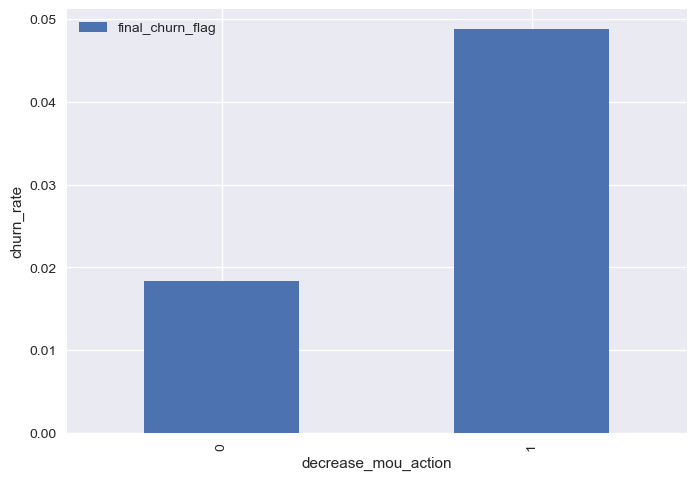

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase


In [773]:
#Churn rate vs MOU in action month
data.pivot_table(values='final_churn_flag', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn_rate')
plt.show()
print('We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase')

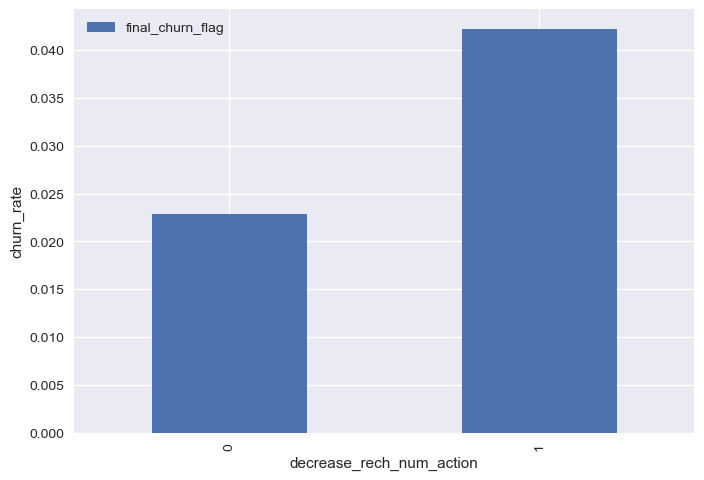

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase


In [774]:
# Churn rate vs number of recharge in action month
data.pivot_table(values='final_churn_flag', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn_rate')
plt.show()
print('As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase')

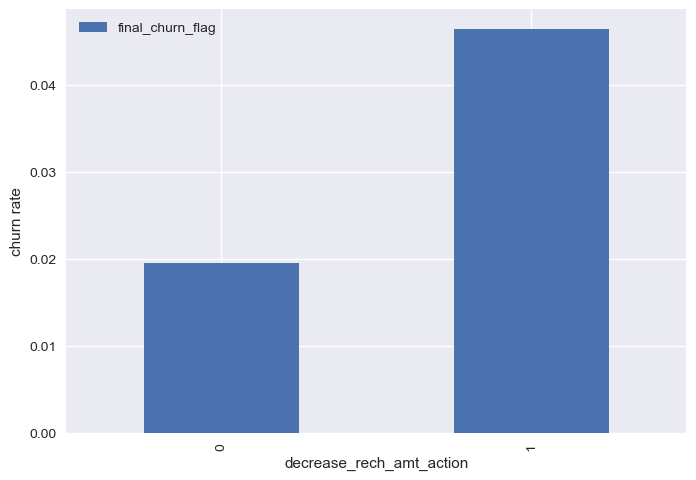

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase


In [775]:
# churn_rate vs amount of recharge
data.pivot_table(values='final_churn_flag', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()
print('The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase')

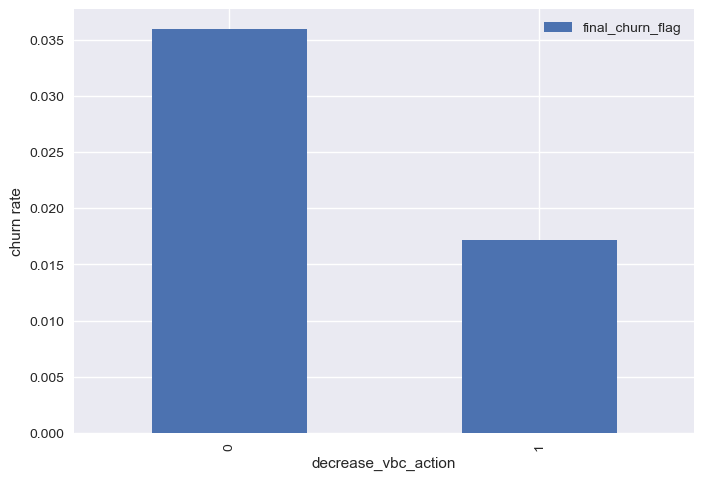

The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase


In [776]:
# churn_rate vs volume based
data.pivot_table(values='final_churn_flag', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()
print('The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase')

##### Analysis of the average revenue per customer

The higher ARPU customers are less likely to be churned.


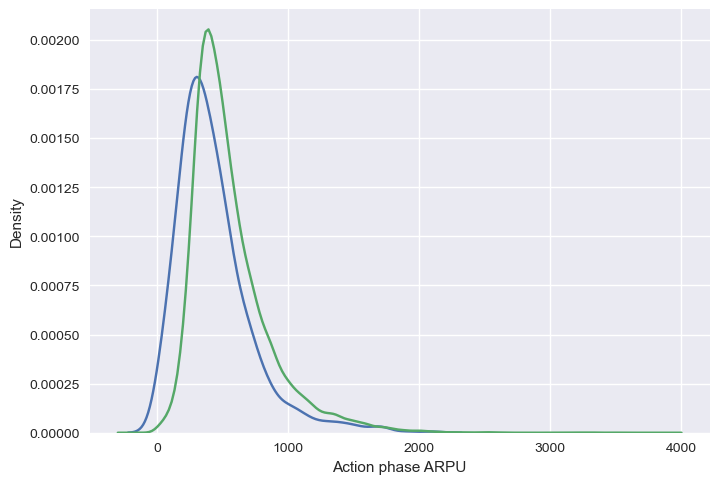

In [777]:
ax = sns.distplot(data['avg_arpu_action'][data['final_churn_flag'] == 1],label='churn',hist=False)
ax = sns.distplot(data['avg_arpu_action'][data['final_churn_flag'] == 0],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')
print('The higher ARPU customers are less likely to be churned.')

##### Analysis of the minutes of usage MOU

Higher the MOU, lesser the churn probability


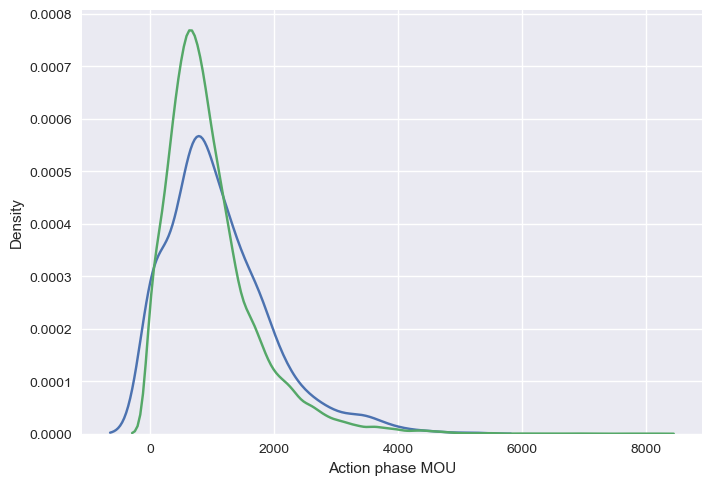

In [778]:
ax = sns.distplot(data['total_mou_good'][data['final_churn_flag'] == 1],label='churn',hist=False)
ax = sns.distplot(data['total_mou_good'][data['final_churn_flag'] == 0],label='not churn',hist=False)
ax.set(xlabel='Action phase MOU')
print('Higher the MOU, lesser the churn probability')

#### Bi Variate Analysis

##### Analysis of recharge amount and number of recharge in action month

recharge number and the recharge amount are mostly propotional


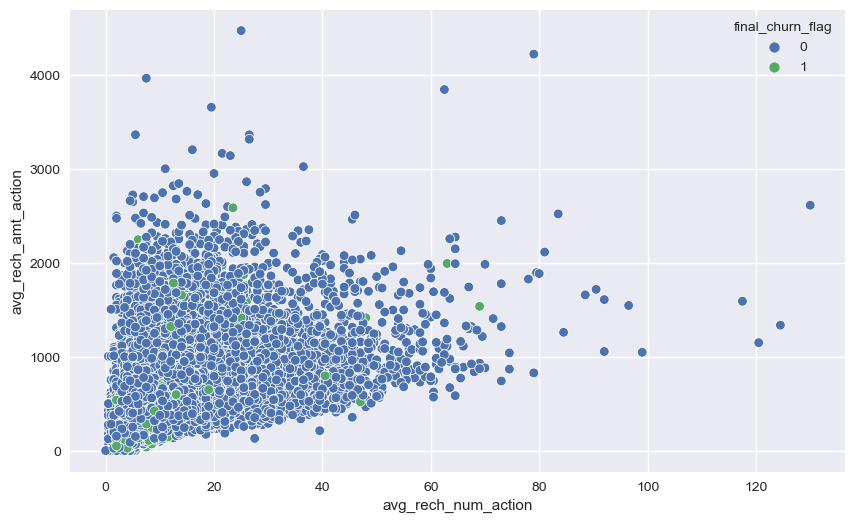

In [779]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='final_churn_flag', data=data)
print('recharge number and the recharge amount are mostly propotional')

In [780]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc'], axis=1)

In [781]:
data.select_dtypes(exclude=['object']).columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_rech_amt_6_7',
       'final_churn_flag', 'decrease_mou_action', 'decrease_rech_num_action',
       'decrease_rech_amt_action', 'decrease_arpu_action',
       'decrease_vbc_action'],
      dtype='object', length=140)

In [782]:
data=data.astype(float)
data.dtypes

mobile_number               float64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
arpu_6                      float64
                             ...   
decrease_mou_action         float64
decrease_rech_num_action    float64
decrease_rech_amt_action    float64
decrease_arpu_action        float64
decrease_vbc_action         float64
Length: 141, dtype: object

In [783]:
data['mobile_number']=data.mobile_number.astype(str)
data['final_churn_flag']=data.final_churn_flag.astype(str)

#### Train Test Split

In [784]:
# adding feature variables into X
X = data.drop(['mobile_number','final_churn_flag'], axis=1)
X

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,519.0,1.0,1.0,1.0,1.0,0.0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6.0,4.0,11.0,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.0,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,380.0,1.0,0.0,1.0,1.0,0.0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,0.00,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.6

In [785]:
# adding target variable to y
y = data['final_churn_flag']
y

8        0.0
13       0.0
16       0.0
17       0.0
21       0.0
        ... 
99970    0.0
99974    0.0
99986    0.0
99988    0.0
99997    0.0
Name: final_churn_flag, Length: 27705, dtype: object

In [786]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Handling data imbalance by creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique)

In [787]:
# Instantiate SMOTE

sm = SMOTE(random_state=27)

In [788]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

#### Feature Scaling

In [789]:
# Instantiate the Scaler
scaler = StandardScaler()

In [790]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')


In [791]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [792]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.138099,-0.524287,-0.277210,0.107067,-0.662133,-0.465702,-0.212150,-0.635989,0.316602,-0.254930,-0.001299,-0.235845,-0.299924,-0.376405,-0.414431,-0.263290,-0.311912,-0.251552,0.484696,-0.191237,-0.399363,-0.257169,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,0.128525,-0.336170,-0.418989,0.255586,-0.528520,-0.337598,-0.342567,-0.503801,0.649999,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.048264,-0.731099,0.214395,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.018022,-0.347135,-0.015583,-0.013735,-0.000842,-0.860270,-0.011338,-0.204497,-0.267019,-0.242904,-0.380904,-0.273133,-0.437678,-0.290227,-0.270855,-0.150113,-0.409476,-0.364422,-0.440556,-0.175817,-0.159844,0.078725,-0.165109,0.366888,-0.117347,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.235898,0.120717,-0.064064,-0.476525,-0.287711,-0.420934,-0.366938,-0.089565,-0.191817,-0.152636,-0.154479,-0.126705,-0.099701,-0.120560,-0.081522,0.164440,-0.472561,0.278812,0.041024,-0.727270,-0.236763,0.052564,0.021721,0.028165,0.600132,-0.812931,-0.628379,-0.094599,0.700387,1.751483,0.513596,1.201853,-0.241485,3.050044,2.935223,-0.250143,3.921419,2.284816,2.389392,-0.242792,-0.238079,-0.222457,-0.154931,-0.154645,-0.123537,-0.361684,-0.236073,-0.265248,0.110852,-0.426903,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,-1.426806,4.416224,3.251471,-0.658546,-0.237116,-0.004389,-0.775413,2.521574,2.729991,-0.254930,-0.253598,-0.304936,-0.299924,-0.376405,-0.432652,-0.201389,0.270420,0.198129,-0.529895,1.105781,0.288744,-0.276559,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.477412,0.843110,0.290263,-0.570492,-0.320415,-0.040870,-0.512457,2.293280,3.084824,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.771806,1.366671,2.063557,-0.080736,-0.092210,-0.061548,-0.349272,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.970474,1.667933,1.938185,-0.411171,0.192864,0.156404,-0.482016,0.744097,0.256463,-0.290227,-0.270855,-0.257736,-0.583618,0.569677,0.219308,-0

#### Scaling the test set ( transform)

In [793]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.241426,-0.270857,1.004286,-0.725392,-0.690239,-0.476559,0.480613,0.306880,2.321843,-0.077770,-0.253598,-0.304936,0.213029,-0.376405,-0.432652,-0.278196,-0.282988,-0.106923,0.027413,0.005712,0.033944,-0.088284,-0.268141,-0.245271,0.034550,-0.268757,-0.245087,-0.161739,-0.195986,-0.055352,-0.610719,-0.570355,-0.419779,0.345721,0.369717,2.699760,-0.144889,-0.14045,-0.119425,0.0,0.0,0.0,-0.214893,-0.152342,1.550206,-0.080736,-0.09221,-0.061548,1.046227,0.769115,0.756843,0.310975,-0.015583,-0.013735,-0.254734,-0.210329,1.353627,-0.357411,-0.095324,0.281713,0.088773,-0.113229,0.515837,-0.290227,-0.270855,-0.194305,-0.156563,-0.166880,0.468091,-0.216145,-0.200470,-0.187246,0.112473,-0.185608,-0.166229,-0.136268,-0.137646,-0.110633,0.0,0.0,0.0,-0.079108,-0.265838,-0.233517,-0.195250,-0.205183,0.286117,-0.366938,-0.089565,-0.191817,-0.152636,0.283914,-0.126705,-0.099701,-0.12056,-0.081522,-0.183532,0.231675,1.284306,0.084329,-0.239069,0.815808,0.052564,-0.175912,0.028165,0.173829,0.366701,-0.353405,3.322563,2.186970,-0.098368,-0.263171,-0.064325,0.507365,3.050044,-0.280520,-0.250143,0.416331,2.284816,2.389392,-0.242792,-0.238079,-0.222457,1.241898,1.156315,2.487437,0.224674,0.018315,0.195420,-0.259107,-0.097181,0.0,0.0,1.0,1.0,0.0
64892,0.0,0.0,0.0,0.045864,-0.780568,-0.158953,-0.734179,-0.698080,-0.502143,-0.359083,-0.577343,-0.256317,0.022647,-0.253598,-0.304936,-0.120567,-0.376405,-0.432652,-0.278359,-0.302953,-0.174725,-0.300718,-0.204587,-0.296065,-0.262173,-0.268141,-0.245271,-0.192015,-0.268757,-0.245087,-0.379480,-0.338577,-0.306903,-0.619861,-0.570355,-0.415489,-0.232172,-0.436745,-0.040625,-0.144889,-0.14045,-0.104453,0.0,0.0,0.0,-0.616567,-0.714280,-0.305692,-0.080736,-0.09221,-0.061548,-0.328949,-0.364631,-0.291120,-0.347135,-0.015583,-0.013735,-0.776089,-0.845186,-0.422237,-0.108509,-0.347909,-0.187577,0.377466,0.198985,0.240809,-0.275563,-0.257474,-0.235189,0.172282,-0.079190,0.045787,-0

#### Model with PCA

In [794]:
# Instantiate PCA
pca = PCA(random_state=42)

In [795]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [796]:
# Principal components
pca.components_

array([[-9.73912301e-20, -5.55111512e-17,  1.11022302e-16, ...,
        -2.98821132e-02, -2.95153355e-02,  1.21289153e-02],
       [-1.54311788e-19, -1.11022302e-16,  4.44089210e-16, ...,
        -3.56243508e-03, -2.25220715e-03, -1.41444734e-02],
       [ 1.95264919e-19,  1.11022302e-16, -5.55111512e-17, ...,
        -2.90353175e-02, -2.95470767e-02,  3.04107957e-02],
       ...,
       [ 0.00000000e+00, -1.97840366e-01,  1.48296197e-01, ...,
         3.29597460e-17,  2.28983499e-16,  5.20417043e-17],
       [ 9.99998341e-01,  4.82546730e-04,  1.56507044e-03, ...,
         4.74338450e-19,  1.82959117e-19, -1.71574994e-17],
       [-0.00000000e+00, -4.51916568e-01,  4.48587080e-01, ...,
         4.16333634e-17, -1.11022302e-16,  1.38777878e-17]])

In [797]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11216237 0.19669328 0.24896228 0.29247208 0.33149735 0.36930379
 0.40526446 0.43497532 0.46044928 0.48518613 0.50789407 0.52975353
 0.55010663 0.56967901 0.58780274 0.60545756 0.62123107 0.63693916
 0.65139426 0.66544932 0.67904366 0.69197667 0.70376035 0.71440506
 0.72468893 0.73461395 0.74427069 0.75377366 0.76312979 0.77166561
 0.7801386  0.78813337 0.79578905 0.80319831 0.81019471 0.81680552
 0.82325792 0.82962109 0.83594907 0.84202466 0.84796118 0.85385265
 0.85942419 0.86484836 0.87012616 0.87526871 0.88001848 0.88452221
 0.88879452 0.89296527 0.89696287 0.90075704 0.90451135 0.90820982
 0.91172447 0.91521622 0.91860042 0.921868   0.92512033 0.92817657
 0.93111741 0.93403766 0.93684155 0.93960835 0.94233592 0.94504599
 0.94768647 0.95026179 0.95276728 0.95522361 0.95750848 0.95977661
 0.96197275 0.96400932 0.96602095 0.96793182 0.96980556 0.97166318
 0.9734994  0.97526972 0.97697783 0.9786324  0.98023969 0.98179581
 0.98333794 0.98486896 0.98637318 0.9878655  0.98909898 0.9902

Text(0, 0.5, 'Cumulative Variance')

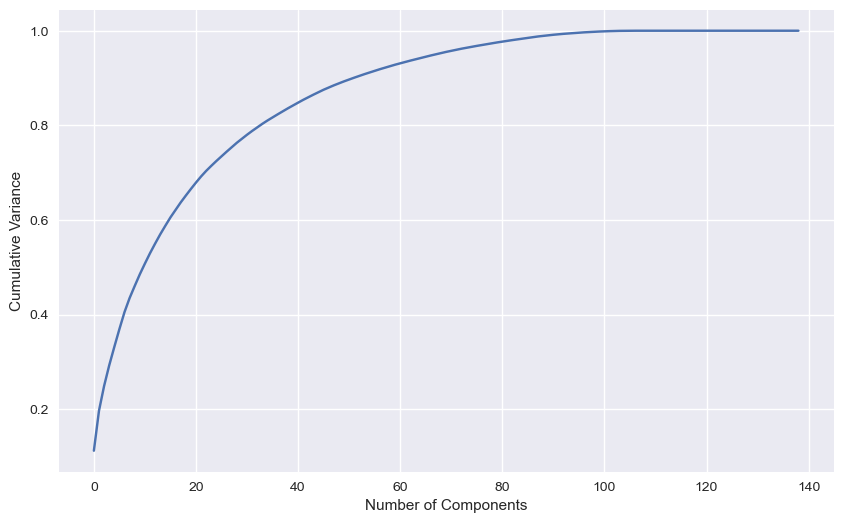

In [798]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

###### We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

In [799]:
from sklearn.decomposition import IncrementalPCA

In [800]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [812]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train.astype(float))

In [813]:
# Applying transformation on the test set
# since we have done the fitting on the train set we are doing only tranform for the test set
X_test_pca = pca_final.transform(X_test.astype(float))

In [815]:
X_train_pca

array([[-1.18103250e+00, -1.40994656e+00,  1.10360591e+00, ...,
         1.90745328e-01, -3.55407679e-01,  5.99116063e-02],
       [ 3.08539290e+00,  5.74656080e+00,  1.77925821e+00, ...,
        -3.12346907e-04,  1.07702427e-01, -4.12540292e-03],
       [ 2.69228130e+00, -2.98614233e+00,  3.53633470e+00, ...,
         5.10222557e-01,  4.73786848e-01,  7.81505728e-02],
       ...,
       [-6.69166898e-01, -1.06208924e+00,  8.60408822e-01, ...,
         1.08484919e+00,  8.93521749e-01, -1.64247496e+00],
       [-2.62903795e+00, -2.14467424e-01, -8.31579334e-01, ...,
         9.29948529e-02, -6.28584818e-02, -3.82592128e-03],
       [-1.54057493e+00,  2.21154486e+00, -5.27270637e-01, ...,
        -8.87925354e-02, -4.69195500e-03, -7.69376473e-02]])

##### we need to care more about churn cases than the not churn cases, so sensitivity and recall score is more important than accuracy

#### Logistic regression with PCA

In [816]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [817]:
# Tuning hyperparameter C
#C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.


# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [822]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
params

{'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

In [823]:
log_reg = LogisticRegression()

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(log_reg, params, cv=folds) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [824]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.240974,0.019170,0.013882,0.000591,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.856359,0.860560,0.857410,0.862194,0.857176,0.858740,0.002242,26
1,0.469431,0.030735,0.013413,0.000134,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.855893,0.860093,0.857060,0.862077,0.857760,0.858576,0.002224,28
2,0.233695,0.025369,0.013927,0.001062,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.855893,0.860093,0.857176,0.862077,0.857760,0.858600,0.002208,27
3,1.298823,0.010372,0.014082,0.000526,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.856009,0.859743,0.857176,0.861960,0.857760,0.858530,0.002099,29
4,1.369423,0.009960,0.013676,0.000256,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.856126,0.859393,0.857410,0.861844,0.857060,0.858366,0.002039,30
5,0.311074,0.011561,0.013711,0.000363,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.857643,0.860560,0.857993,0.862427,0.858110,0.859347,0.001856,13
6,0.644322,0.032987,0.013570,0.000406,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.857526,0.860560,0.857876,0.862194,0.858110,0.859253,0.001819,16
7,0.370991,0.011582,0.013348,0.000054,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.857526,0.860560,0.857876,0.862194,0.858110,0.859253,0.001819,16
8,1.305609,0.026866,0.013534,0.000230,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.857643,0.860793,0.857293,0.862544,0.857526,0.859160,0.002125,20
9,1.373834,0.014723,0.013793,0.000573,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.856826,0.859860,0.857643,0.862894,0.857643,0.858973,0.002205,25


In [826]:
# # plot of C versus train and validation scores

# plt.figure(figsize=(8, 6))
# plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
# plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
# plt.xlabel('C')
# plt.ylabel('sensitivity')
# plt.legend(['test result', 'train result'], loc='upper left')
# plt.xscale('log')
# # model_cv.best_score_

In [827]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8597432905484247 at C = 10


In [828]:
best_score

0.8597432905484247

### Logistic regression with optimal C

In [829]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [830]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [831]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [832]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17747  3678]
 [ 2310 19115]]


In [833]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [834]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8602567094515753
Sensitivity:- 0.8921820303383897
Specificity:- 0.8283313885647607


#### Prediction on the test set

In [835]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [836]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4387  961]
 [  36  157]]


In [837]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [838]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8200685796787583
Sensitivity:- 0.8134715025906736
Specificity:- 0.8203066566940912


##### Model summary logistic reg

1. Train_set
    Accuracy:- 86%
    Sensitivity:- 89%
    Specificity:- 82%
2. Test_set
    Accuracy:- 82%
    Sensitivity:- 81%
    Specificity:- 82%

### Support Vector Machine(SVM) with PCA

In [627]:
from sklearn.svm import SVC

In [628]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [629]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.971723,0.299551,14.721078,0.374332,1,0.01,"{'C': 1, 'gamma': 0.01}",0.941823,0.939368,0.937688,0.939627,0.001698,5,0.944514,0.944796,0.946197,0.945169,0.000736
1,25.209588,0.141827,19.866429,0.107788,1,0.001,"{'C': 1, 'gamma': 0.001}",0.881546,0.878597,0.881117,0.880420,0.001301,10,0.880207,0.883747,0.880667,0.881540,0.001572
2,30.947797,0.214318,25.038278,0.115472,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.854873,0.853252,0.854512,0.854212,0.000695,12,0.854022,0.855988,0.854727,0.854912,0.000813
3,17.741165,0.132774,9.556199,0.055184,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967446,0.965763,0.965483,0.966231,0.000867,3,0.974795,0.975146,0.975321,0.975088,0.000219
4,22.577303,0.034998,16.515573,0.028388,10,0.001,"{'C': 10, 'gamma': 0.001}",0.907029,0.905202,0.902822,0.905017,0.001723,7,0.907582,0.907376,0.908076,0.907678,0.000294
5,26.363140,0.193046,20.942518,0.967229,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.865934,0.865434,0.866905,0.866091,0.000610,11,0.866485,0.868275,0.866209,0.866989,0.000916
6,22.253771,0.280809,6.744343,0.541718,100,0.01,"{'C': 100, 'gamma': 0.01}",0.976757,0.977246,0.976756,0.976919,0.000231,2,0.991213,0.991144,0.990864,0.991074,0.000151
7,26.104362,0.054740,14.019097,0.121285,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935732,0.934258,0.931247,0.933746,0.001867,6,0.938948,0.940281,0.939546,0.939592,0.000545
8,26.068699,0.214246,19.825984,0.435397,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.882176,0.880067,0.880277,0.880840,0.000948,9,0.880417,0.884202,0.881682,0.882100,0.001573
9,37.906499,1.198035,4.788498,0.201701,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.975707,0.978926,0.978016,0.977550,0.001355,1,0.998810,0.998670,0.998740,0.998740,0.000057


##### Plotting the accuracy with various C and gamma values

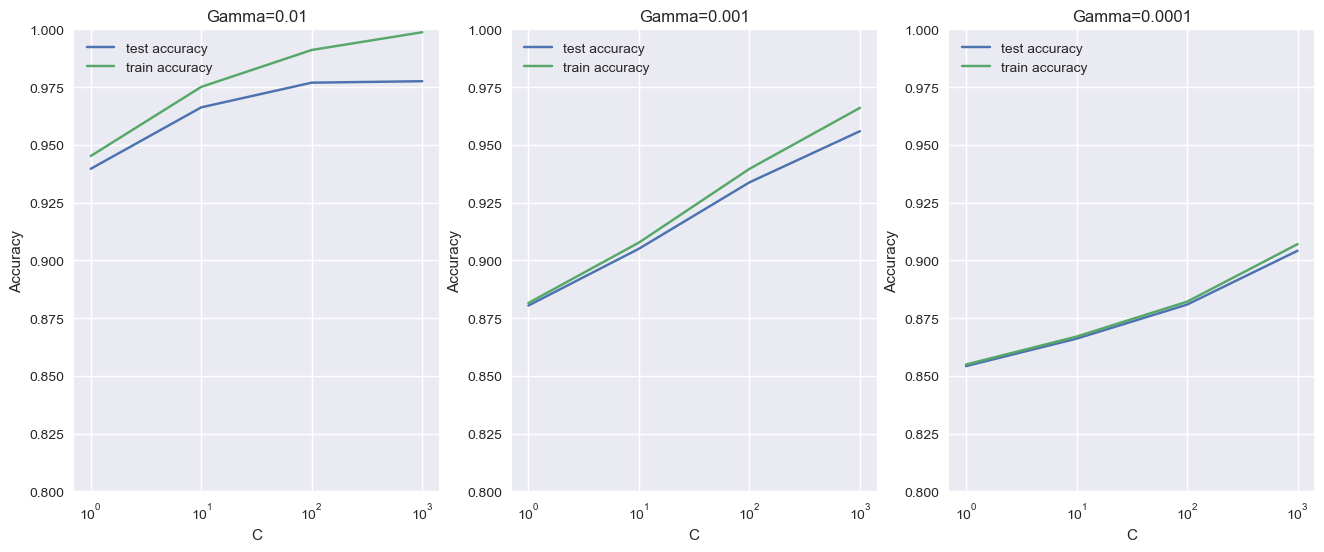

In [630]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [631]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9775496345985939 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

##### Build the model with optimal hyperparameters

In [632]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

Prediction on the train set

In [633]:
y_train_pred = svm_pca_model.predict(X_train_pca)

In [634]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18232  3193]
 [ 1740 19685]]


In [635]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [636]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.88487747957993
Sensitivity:- 0.9187864644107351
Specificity:- 0.8509684947491248


##### Prediction on the test set

In [637]:
y_test_pred = svm_pca_model.predict(X_test_pca)

In [638]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4536  812]
 [  36  157]]


In [639]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [640]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8469590326655838
Sensitivity:- 0.8134715025906736
Specificity:- 0.8481675392670157


#### Model Summary  ( SVM )
1. Train_set
    Accuracy:- 88%
    Sensitivity:- 91%
    Specificity:- 85%
2. Test_set 
    Accuracy:- 84%
    Sensitivity:- 81%
    Specificity:- 84%
###### model gave much better resuly compared to normal logistic reg model

#### Looks like the model is overfitting

### Decision tree with PCA

In [641]:
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [642]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [643]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.946276,0.007118,0.025056,0.001211,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.942390,0.000300,0.024386,0.000329,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.945005,0.008801,0.024414,0.000303,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.937329,0.000698,0.024506,0.000135,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1.612208,0.011692,0.024604,0.000367,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1.607868,0.005925,0.024733,0.000214,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,1.527405,0.010373,0.024894,0.000165,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,1.529602,0.008118,0.024397,0.000267,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [644]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- nan
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


#### Model with optimal hyperparameters

In [645]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [646]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [647]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18856  2569]
 [ 2219 19206]]


In [648]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [649]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8882613768961494
Sensitivity:- 0.8964294049008168
Specificity:- 0.8800933488914819


##### Prediction on the test set

In [650]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [651]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4625  723]
 [  64  129]]


In [652]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [653]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8579678758346869
Sensitivity:- 0.6683937823834197
Specificity:- 0.8648092744951383


##### Model Summary (Decision Tree with PCA)
1. Train_Set
    Accuracy:- 88%
    Sensitivity:- 89%
    Specificity:- 88%
2. Test_set
    Accuracy:- 85%
    Sensitivity:- 66%
    Specificity:- 86%
###### We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Random forest with PCA

In [654]:
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [655]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [656]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8403499726648801 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


#### Model with optimal hyperparameters

In [657]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [658]:

# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [659]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [660]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17314  4111]
 [ 2579 18846]]


In [661]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [662]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8438739789964994
Sensitivity:- 0.8796266044340724
Specificity:- 0.8081213535589264


##### Prediction on the test set


In [663]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [664]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)


[[4285 1063]
 [  49  144]]


In [665]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [666]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7993142032124165
Sensitivity:- 0.7461139896373057
Specificity:- 0.8012341062079282


##### Model Summary ( random forrest )
1. Train_set
    Accuracy:- 84%
    Sensitivity:- 87%
    Specificity:- 80%
2. Test_Set
    Accuracy:- 79%
    Sensitivity:- 74%
    Specificity:- 80%


#### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. 

#### Without PCA

In [667]:
import statsmodels.api as sm

In [668]:
# X_train.select_dtypes(include=['object']).columns

In [669]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))), family=sm.families.Binomial())

In [670]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

##### Feature selection using RFE

In [671]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [672]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg,n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [673]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'monthly_3g_8'],
      dtype='object')


##### model 1

In [674]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train.astype(float), X_train_sm_1.astype(float), family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       final_churn_flag   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Mar 2023   Deviance:                       31987.
Time:                        23:42:08   Pearson chi2:                 1.43e+07
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -53.0626   4233.046     -0.013      0.990   -8349.681    8243.555
arpu_8              -0.6215      0.026    -23.683      0.000      -0.673      -0.570
offnet_mou_7         0.4368      0.077      5.669      0.000       0.286       0.588
offnet_mou_8        -3.5379      0.258    -13.718      0.000      -4.043      -3.032
roam_og_mou_8        1.5133      0.055     27.714      0.000       1.406       1.620
loc_og_t2m_mou_8     0.3946      0.128      3.090      0.002       0.144       0.645
std_og_t2m_mou_7     0.2109      0.079      2.669      0.008       0.056       0.366
std_og_t2m_mou_8     2.8002      0.228     12.302      0.000       2.354       3.246
isd_og_mou_8        -0.8552      0.191     -4.474      0.000      -1.230      -0.481
og_others_7         -1.0149      0.694     -1.462      0.144      -2.375       0.345
og_others_8      -3793.0186   3.08e+05     -0.012      0.990   -6.08e+05       6e+05
loc_ic_t2f_mou_8    -0.7521      0.071    -10.636      0.000      -0.891      -0.614
loc_ic_mou_8        -1.9693      0.067    -29.607      0.000      -2.100      -1.839
std_ic_t2f_mou_8    -0.6480      0.070     -9.215      0.000      -0.786      -0.510
ic_others_8         -1.4541      0.127    -11.405      0.000      -1.704      -1.204
monthly_3g_8        -0.6360      0.032    -19.811      0.000      -0.699      -0.573
====================================================================================
"""

##### checking vifs

In [675]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [676]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,116.11
6,std_og_t2m_mou_8,90.36
4,loc_og_t2m_mou_8,23.15
5,std_og_t2m_mou_7,17.13
1,offnet_mou_7,16.52
3,roam_og_mou_8,4.01
0,arpu_8,2.51
11,loc_ic_mou_8,1.71
10,loc_ic_t2f_mou_8,1.22
14,monthly_3g_8,1.17


In [677]:
#Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['arpu_8', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'monthly_3g_8']


##### model 2

In [678]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train.astype(float), X_train_sm_2.astype(float), family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       final_churn_flag   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16030.
Date:                Mon, 13 Mar 2023   Deviance:                       32060.
Time:                        23:42:08   Pearson chi2:                 1.42e+07
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4717
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9850      0.029    -33.826      0.000      -1.042      -0.928
arpu_8              -0.6224      0.026    -23.733      0.000      -0.674      -0.571
offnet_mou_7         0.4401      0.077      5.716      0.000       0.289       0.591
offnet_mou_8        -3.5557      0.257    -13.824      0.000      -4.060      -3.052
roam_og_mou_8        1.5145      0.054     27.805      0.000       1.408       1.621
loc_og_t2m_mou_8     0.4037      0.127      3.169      0.002       0.154       0.653
std_og_t2m_mou_7     0.2059      0.079      2.608      0.009       0.051       0.361
std_og_t2m_mou_8     2.8162      0.227     12.405      0.000       2.371       3.261
isd_og_mou_8        -0.9672      0.207     -4.672      0.000      -1.373      -0.561
og_others_7         -1.5087      0.694     -2.175      0.030      -2.868      -0.149
loc_ic_t2f_mou_8    -0.7525      0.071    -10.644      0.000      -0.891      -0.614
loc_ic_mou_8        -1.9696      0.066    -29.629      0.000      -2.100      -1.839
std_ic_t2f_mou_8    -0.6598      0.071     -9.323      0.000      -0.799      -0.521
ic_others_8         -1.4498      0.127    -11.382      0.000      -1.699      -1.200
monthly_3g_8        -0.6340      0.032    -19.768      0.000      -0.697      -0.571
====================================================================================
"""

##### checking vif

In [679]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,offnet_mou_8,116.10
6,std_og_t2m_mou_8,90.35
4,loc_og_t2m_mou_8,23.15
5,std_og_t2m_mou_7,17.12
1,offnet_mou_7,16.52
3,roam_og_mou_8,4.01
0,arpu_8,2.51
10,loc_ic_mou_8,1.71
9,loc_ic_t2f_mou_8,1.22
13,monthly_3g_8,1.17


In [680]:
## deleting offnet_mou_8 coz having high vif
log_cols.remove('offnet_mou_8')

##### model 3 

In [681]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train.astype(float), X_train_sm_3.astype(float), family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       final_churn_flag   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16132.
Date:                Mon, 13 Mar 2023   Deviance:                       32264.
Time:                        23:42:09   Pearson chi2:                 9.41e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4692
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0197      0.030    -34.565      0.000      -1.078      -0.962
arpu_8              -0.6425      0.026    -24.588      0.000      -0.694      -0.591
offnet_mou_7         0.1659      0.075      2.220      0.026       0.019       0.312
roam_og_mou_8        0.9243      0.028     32.911      0.000       0.869       0.979
loc_og_t2m_mou_8    -1.1463      0.061    -18.800      0.000      -1.266      -1.027
std_og_t2m_mou_7     0.4461      0.078      5.749      0.000       0.294       0.598
std_og_t2m_mou_8    -0.2947      0.029    -10.109      0.000      -0.352      -0.238
isd_og_mou_8        -1.1227      0.219     -5.138      0.000      -1.551      -0.694
og_others_7         -1.5764      0.712     -2.214      0.027      -2.972      -0.181
loc_ic_t2f_mou_8    -0.7834      0.070    -11.114      0.000      -0.922      -0.645
loc_ic_mou_8        -1.9524      0.066    -29.373      0.000      -2.083      -1.822
std_ic_t2f_mou_8    -0.7436      0.072    -10.299      0.000      -0.885      -0.602
ic_others_8         -1.4905      0.128    -11.620      0.000      -1.742      -1.239
monthly_3g_8        -0.6917      0.034    -20.398      0.000      -0.758      -0.625
====================================================================================
"""

NameError: name 'sort' is not defined

In [682]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,std_og_t2m_mou_7,16.05
1,offnet_mou_7,15.07
3,loc_og_t2m_mou_8,3.40
5,std_og_t2m_mou_8,2.73
0,arpu_8,2.48
9,loc_ic_mou_8,1.71
2,roam_og_mou_8,1.50
8,loc_ic_t2f_mou_8,1.21
12,monthly_3g_8,1.17
6,isd_og_mou_8,1.07


###### Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.



###### model performance on train set

In [683]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    5.350385e-01
1    4.383753e-02
2    2.124582e-02
3    1.522495e-02
4    1.706301e-19
dtype: float64

In [684]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0.0,5.350385e-01,0
1,0.0,4.383753e-02,1
2,0.0,2.124582e-02,2
3,0.0,1.522495e-02,3
4,0.0,1.706301e-19,4


#### finding optimal cutoff point

In [685]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,5.350385e-01,0,1,1,1,1,1,1,0,0,0,0
1,0.0,4.383753e-02,1,1,0,0,0,0,0,0,0,0,0
2,0.0,2.124582e-02,2,1,0,0,0,0,0,0,0,0,0
3,0.0,1.522495e-02,3,1,0,0,0,0,0,0,0,0,0
4,0.0,1.706301e-19,4,1,0,0,0,0,0,0,0,0,0


##### calculate the accuracy sensitivity and specificity for various probability cutoff

In [686]:

cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'].astype(float), y_train_pred_final[i].astype(float) )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.740863     0.982637     0.499090
0.2          0.2  0.781890     0.965461     0.598320
0.3          0.3  0.809662     0.947258     0.672065
0.4          0.4  0.828915     0.923547     0.734282
0.5          0.5  0.840490     0.886114     0.794866
0.6          0.6  0.844411     0.834119     0.854702
0.7          0.7  0.833676     0.759953     0.907398
0.8          0.8  0.795053     0.638600     0.951505
0.9          0.9  0.599837     0.219090     0.980583


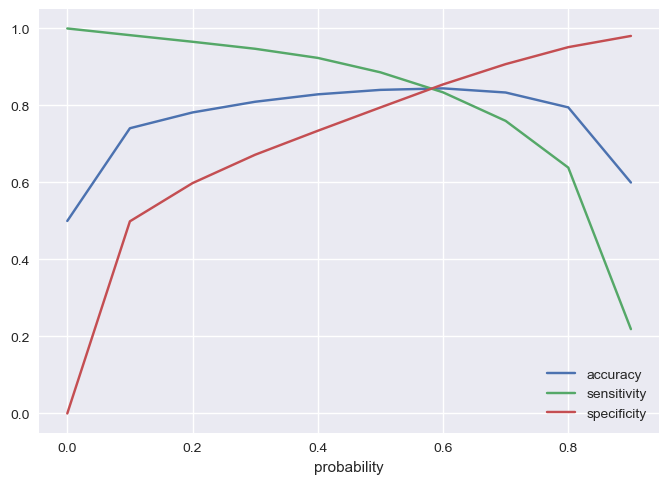

In [687]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for acheiving higher sensitivity, which is our main goal.

In [688]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0.0,5.350385e-01,0,1,1,1,1,1,1,0,0,0,0,1
1,0.0,4.383753e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0.0,2.124582e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0.0,1.522495e-02,3,1,0,0,0,0,0,0,0,0,0,0
4,0.0,1.706301e-19,4,1,0,0,0,0,0,0,0,0,0,0


In [689]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'].astype(float), y_train_pred_final['predicted'].astype(float))
print(confusion)


[[17030  4395]
 [ 2440 18985]]


In [690]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [691]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'].astype(float), y_train_pred_final['predicted'].astype(float)))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.84049008168028
Sensitivity:- 0.8861143523920654
Specificity:- 0.7948658109684947


### Plotting the ROC Curve

In [692]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

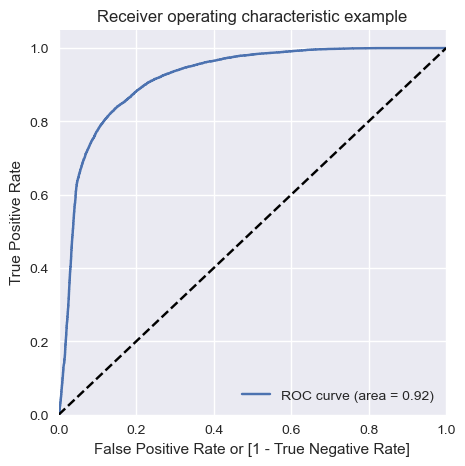

In [693]:
draw_roc(y_train_pred_final['churn'].astype(float), y_train_pred_final['churn_prob'].astype(float))

## Testing model on test data 

In [694]:
X_test_log = X_test.copy()

In [695]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [696]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [697]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [698]:
y_test_pred.head()

5704     0.047699
64892    0.093998
39613    0.002323
93118    0.051812
81235    0.015766
dtype: float64

In [699]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.047699
64892,0.093998
39613,0.002323
93118,0.051812
81235,0.015766


In [700]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,final_churn_flag
5704,0.0
64892,0.0
39613,0.0
93118,0.0
81235,0.0


In [701]:

# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [702]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [703]:

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [704]:
y_test_pred_final.head()

,final_churn_flag,CustID,0
0,0.0,5704,0.047699
1,0.0,64892,0.093998
2,0.0,39613,0.002323
3,0.0,93118,0.051812
4,0.0,81235,0.015766


In [705]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [706]:
y_test_pred_final.head()

,final_churn_flag,CustID,churn_prob
0,0.0,5704,0.047699
1,0.0,64892,0.093998
2,0.0,39613,0.002323
3,0.0,93118,0.051812
4,0.0,81235,0.015766


In [707]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [708]:
y_test_pred_final.head()


,final_churn_flag,CustID,churn_prob,test_predicted
0,0.0,5704,0.047699,0
1,0.0,64892,0.093998,0
2,0.0,39613,0.002323,0
3,0.0,93118,0.051812,0
4,0.0,81235,0.015766,0


### Metrics

In [709]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['final_churn_flag'].astype(float), y_test_pred_final['test_predicted'].astype(float))
print(confusion)

[[4237 1111]
 [  32  161]]


In [710]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [711]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['final_churn_flag'].astype(float), y_test_pred_final['test_predicted'].astype(float)))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7937195452084461
Sensitivity:- 0.8341968911917098
Specificity:- 0.7922587883320867


##### Model Summary ( without pca )
1. Train_set
    Accuracy:- 84%
    Sensitivity:- 88%
    Specificity:- 79%
2. Test_Set
    Accuracy:- 79%
    Sensitivity:- 83%
    Specificity:- 79%
###### Overall, the model is performing well in the test set

##### Final Conclusion
logistic model with no PCA has good sensitivity and accuracy. But simpler logistic model with pca gave better results also
SVM. So we can go ahead with simpler models.


# Recommendations

##### from the below features and their coeffs, we can recommend the company to care more about customers with low incoming and outing calls.
##### also should focus on customers who use less data and have low average recharge .
##### company can give better offers to these customers and get them back to the game.
loc_ic_mou_8:    -1.9524  <br>
og_others_7:     -1.5764  <br>
ic_others_8:     -1.4905<br>
loc_og_t2m_mou_8:-1.1463<br>
isd_og_mou_8:    -1.1227<br>
loc_ic_t2f_mou_8:-0.7834<br>
std_ic_t2f_mou_8:-0.7436<br>
monthly_3g_8:    -0.6917<br>
arpu_8:          -0.6425

The churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase, so they can be focused on.

The churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase, so they can also be targetted on.

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase, we can try giving them some discount or offers.

The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase. Hence we must do something to target such customers pattern.

The higher ARPU (Average Revenue Per user) customers are less likely to be churned. so try to target the lower ARPU customers. 

Higher the Minutes of usage (MOU), lesser the churn probability. So those with low MOU can be given offers or discounts.

The customers who have low minutes of incomming local calls and low ISD outgoing calls are better to be targeted.

The customers with less outgoing charges in July and incomming in August can be targeted.

The customers, whose roaming outgoing minutes of usage is increasing are more likely to churn, so we must focus on them too.